In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# ! pip install sdv

In [12]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
import numpy as np

In [14]:
# read csv file as dataframe, and drop ROW_ID column
def read_csv_no_rowid(file_path):
    df = pd.read_csv(file_path)
    df.drop(["Unnamed: 0", 'row_id'], axis=1, inplace=True)

    return df

In [15]:
# check NaN value

def nan_count(df):
    print("Total columns: " + str(len(df.columns)))
    print("Total rows: " + str(len(df)))
    print("--------------")
    print(df.isnull().sum())

In [16]:
date_set_path = "../temp_sets_100/"

In [17]:
microbiologyevents_sample_df = read_csv_no_rowid(date_set_path + "microbiologyevents.csv")

In [18]:
microbiologyevents_sample_df.head()

,subject_id,hadm_id,chartdate,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
0,26282,123094,2152-03-31,2152-03-31 20:50:00,70070,SWAB,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,26282,123094,2152-03-31,NaN,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26282,123094,2152-03-30,2152-03-30 22:00:00,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26282,123094,2152-03-30,2152-03-30 22:15:00,70079,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26282,123094,2152-03-30,2152-03-30 22:20:00,70012,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Drop some null value
microbiologyevents_sample_df.dropna(subset=['subject_id', 'hadm_id', 'spec_itemid'], inplace=True, axis=0)

In [20]:
# Drop some columns
# microbiologyevents_sample_df.drop(['chartdate'], axis=1, inplace=True)

In [21]:
nan_count(microbiologyevents_sample_df)

Total columns: 15
Total rows: 1625
--------------
subject_id               0
hadm_id                  0
chartdate                0
charttime               68
spec_itemid              0
spec_type_desc           0
org_itemid             751
org_name               750
isolate_num            750
ab_itemid              881
ab_name                881
dilution_text          905
dilution_comparison    905
dilution_value         905
interpretation         881
dtype: int64


In [22]:
# Deal with null values
microbiologyevents_sample_df['charttime'].fillna(microbiologyevents_sample_df['chartdate'], inplace=True)

microbiologyevents_sample_df['org_itemid'].fillna(value=0, inplace=True)
microbiologyevents_sample_df['isolate_num'].fillna(value=0, inplace=True)
microbiologyevents_sample_df['ab_itemid'].fillna(value=0, inplace=True)

microbiologyevents_sample_df['org_name'].fillna(value='Na', inplace=True)
microbiologyevents_sample_df['ab_name'].fillna(value='Na', inplace=True)
microbiologyevents_sample_df['dilution_comparison'].fillna(value='Na', inplace=True)
microbiologyevents_sample_df['org_name'].fillna(value='Na', inplace=True)

microbiologyevents_sample_df['dilution_value'].fillna(value=999, inplace=True)

In [23]:
# Drop some columns. This cell must be below of Deal with null values
microbiologyevents_sample_df.drop(['chartdate'], axis=1, inplace=True)

In [24]:
microbiologyevents_sample_df.loc[microbiologyevents_sample_df['hadm_id']==107657,:]

,subject_id,hadm_id,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation


In [25]:
microbiologyevents_sample_df.dtypes

subject_id               int64
hadm_id                  int64
charttime               object
spec_itemid              int64
spec_type_desc          object
org_itemid             float64
org_name                object
isolate_num            float64
ab_itemid              float64
ab_name                 object
dilution_text           object
dilution_comparison     object
dilution_value         float64
interpretation          object
dtype: object

In [26]:
microbiologyevents_sample_df['charttime'] = pd.to_datetime(microbiologyevents_sample_df['charttime'])
microbiologyevents_sample_df['spec_itemid'] = microbiologyevents_sample_df['spec_itemid'].astype(int)
microbiologyevents_sample_df['org_itemid'] = microbiologyevents_sample_df['org_itemid'].astype(int)
microbiologyevents_sample_df['isolate_num'] = microbiologyevents_sample_df['isolate_num'].astype(int)
microbiologyevents_sample_df['ab_itemid'] = microbiologyevents_sample_df['ab_itemid'].astype(int)

In [27]:
microbiologyevents_sample_df.dtypes

subject_id                      int64
hadm_id                         int64
charttime              datetime64[ns]
spec_itemid                     int32
spec_type_desc                 object
org_itemid                      int32
org_name                       object
isolate_num                     int32
ab_itemid                       int32
ab_name                        object
dilution_text                  object
dilution_comparison            object
dilution_value                float64
interpretation                 object
dtype: object

In [28]:
len(microbiologyevents_sample_df)

1625

---

## Build model

In [29]:
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
from sdv.constraints import FixedCombinations
from sdv.constraints import Inequality

In [30]:
microbiologyevents_sample_df.columns

Index(['subject_id', 'hadm_id', 'charttime', 'spec_itemid', 'spec_type_desc',
       'org_itemid', 'org_name', 'isolate_num', 'ab_itemid', 'ab_name',
       'dilution_text', 'dilution_comparison', 'dilution_value',
       'interpretation'],
      dtype='object')

In [31]:
fixed_subject_hadm_constraint = FixedCombinations(
    column_names=['subject_id', 'hadm_id']
)
fixed_org_itemid_org_name_constraint = FixedCombinations(
    column_names=['org_itemid', 'org_name']
)
fixed_itemid_value_valueuom_constraint = FixedCombinations(
    column_names=['spec_itemid', 'spec_type_desc']
)
fixed_dilution_constraint = FixedCombinations(
    column_names=['ab_itemid', 'ab_name', 'dilution_text', 'dilution_comparison', 'dilution_value']
)

In [32]:
microbiologyevents_constraints = [fixed_subject_hadm_constraint, fixed_org_itemid_org_name_constraint, fixed_itemid_value_valueuom_constraint, fixed_dilution_constraint]

In [33]:
model = CTGAN(
    constraints=microbiologyevents_constraints, 
    batch_size=1000,
    generator_lr=0.0005,
    discriminator_lr=0.0005,
    cuda=True, 
    verbose=True, 
    epochs=200)

In [34]:
len(microbiologyevents_sample_df)

1625

In [35]:
train_data = microbiologyevents_sample_df.loc[0:1000, : ]
model.fit(train_data)

Epoch 1, Loss G:  3.5067,Loss D:  0.0003
Epoch 2, Loss G:  3.5195,Loss D: -0.0290
Epoch 3, Loss G:  3.4425,Loss D: -0.0582
Epoch 4, Loss G:  3.4826,Loss D: -0.0906
Epoch 5, Loss G:  3.4590,Loss D: -0.1393
Epoch 6, Loss G:  3.4628,Loss D: -0.1908
Epoch 7, Loss G:  3.4221,Loss D: -0.2673
Epoch 8, Loss G:  3.4703,Loss D: -0.3461
Epoch 9, Loss G:  3.5002,Loss D: -0.4305
Epoch 10, Loss G:  3.3551,Loss D: -0.4174
Epoch 11, Loss G:  3.4067,Loss D: -0.3796
Epoch 12, Loss G:  3.3790,Loss D: -0.3130
Epoch 13, Loss G:  3.3245,Loss D: -0.3492
Epoch 14, Loss G:  3.3244,Loss D: -0.3004
Epoch 15, Loss G:  3.2602,Loss D: -0.3165
Epoch 16, Loss G:  3.3117,Loss D: -0.3285
Epoch 17, Loss G:  3.2876,Loss D: -0.2613
Epoch 18, Loss G:  3.4171,Loss D: -0.3501
Epoch 19, Loss G:  3.4037,Loss D: -0.4433
Epoch 20, Loss G:  3.4990,Loss D: -0.5028
Epoch 21, Loss G:  3.5263,Loss D: -0.4766
Epoch 22, Loss G:  3.4709,Loss D: -0.4852
Epoch 23, Loss G:  3.5483,Loss D: -0.4786
Epoch 24, Loss G:  3.4173,Loss D: -0.3749
E

In [36]:
model.save(date_set_path + "100_models/" + "microbiologyevents_model.pkl")

In [37]:
# model = CTGAN.load(("/content/drive/MyDrive/MSc Project/microbiologyevents_model.pkl"))

In [38]:
sample = model.sample(num_rows=1000)

Sampling rows: 100%|██████████| 1000/1000 [00:00<00:00, 8130.58it/s]


In [39]:
len(sample)

1000

In [40]:
nan_count(sample)

Total columns: 14
Total rows: 1000
--------------
subject_id               0
hadm_id                  0
charttime                0
spec_itemid              0
spec_type_desc           0
org_itemid               0
org_name                 0
isolate_num              0
ab_itemid                0
ab_name                  0
dilution_text          567
dilution_comparison      0
dilution_value           0
interpretation         512
dtype: int64


In [41]:
sample.dtypes

subject_id                      int64
hadm_id                         int64
charttime              datetime64[ns]
spec_itemid                     int32
spec_type_desc                 object
org_itemid                      int32
org_name                       object
isolate_num                     int32
ab_itemid                       int32
ab_name                        object
dilution_text                  object
dilution_comparison            object
dilution_value                float64
interpretation                 object
dtype: object

In [42]:
evaluate(sample, train_data, metrics=['ContinuousKLDivergence'])

0.6107469606485763

In [43]:
evaluate(sample, train_data, metrics=['DiscreteKLDivergence'])

0.3381050483474987

<AxesSubplot:xlabel='spec_itemid', ylabel='spec_type_desc'>

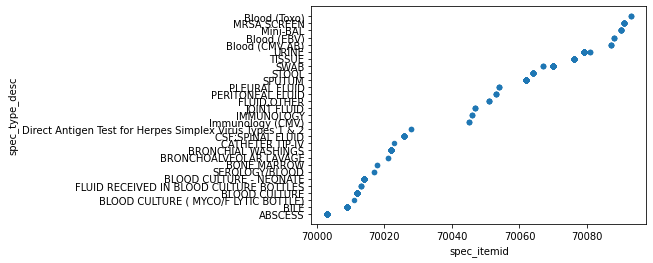

In [44]:
sample.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<AxesSubplot:xlabel='spec_itemid', ylabel='spec_type_desc'>

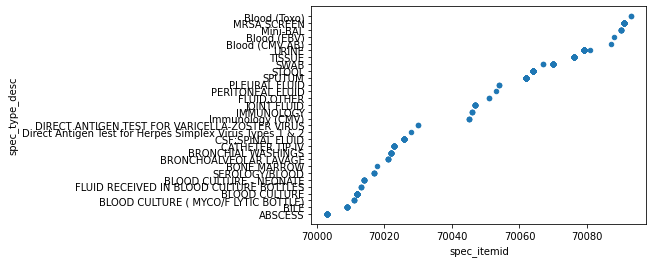

In [45]:
train_data.sort_values('spec_itemid').plot(x='spec_itemid', y='spec_type_desc', kind='scatter')

<AxesSubplot:>

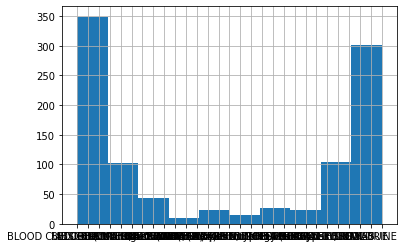

In [46]:
sample.sort_values('spec_type_desc')['spec_type_desc'].hist()

<AxesSubplot:>

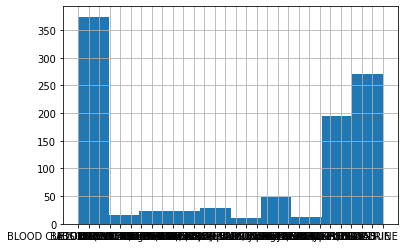

In [47]:
train_data.sort_values('spec_type_desc')['spec_type_desc'].hist()

In [48]:
# evaluate(sample, train_data, aggregate=False)